In [1]:
import pandas as pd
import numpy as np
import os, glob
import datetime
import matplotlib.pyplot as plt

prgname = 'gpsrsrp_multilines_pci_snglebox1.ipynb'

In [2]:
path = "/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/gps_cell_mergedata/SP_Kishore/"
all_files = glob.glob(os.path.join(path, "gps_cell*.csv"))
print(len(all_files))
nfls = len(all_files)


42


In [3]:
#pick the voluteer name
name2 = all_files[0].split("/")[-2]
name = name2.split("_")[-1]
print(name)

Kishore


/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/gps_cell_mergedata/SP_Kishore/gps_cell_merge-null-unknown-2023-06-20-16-35-05-002000000-fill_out_your_user_id.csv
[0, 48, 50, 86, 163, 190, 200, 210, 220, 230, 239, 265, 322, 489, 549, 642, 682, 732, 752, 912, 973, 1013, 1073, 1133, 1153, 1173, 1193, 1213, 1220, 1246, 1256, 1266, 1286, 1336, 1406, 1706, 1816, 1887, 1897, 1907, 1917, 1987, 2037, 2087, 2097, 2127, 2187, 2197, 2207, 2237, 2305, 2307, 2309, 2405, 2465, 2505, 2515, 2525, 2535, 2595, 2616, 2680, 2710, 2770, 2840, 2850, 2860, 2871, 2873, 2899, 2919, 2949, 2959, 2979, 2989, 2999, 3049, 3099, 3129, 3249, 3420, 3476, 3596, 3606, 3626, 3636, 3646, 3686, 3706, 3726, 3746, 3776, 3786, 3796, 3826, 3846, 3876, 3896, 3946, 3996, 4022, 4052, 4082, 4092, 4102, 4112, 4132, 4142, 4162, 4172]
/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/gps_cell_mergedata/SP_Kishore/gps_cell_merge-null-unknown-202

Route: ROUTE_B  no. of files: 12


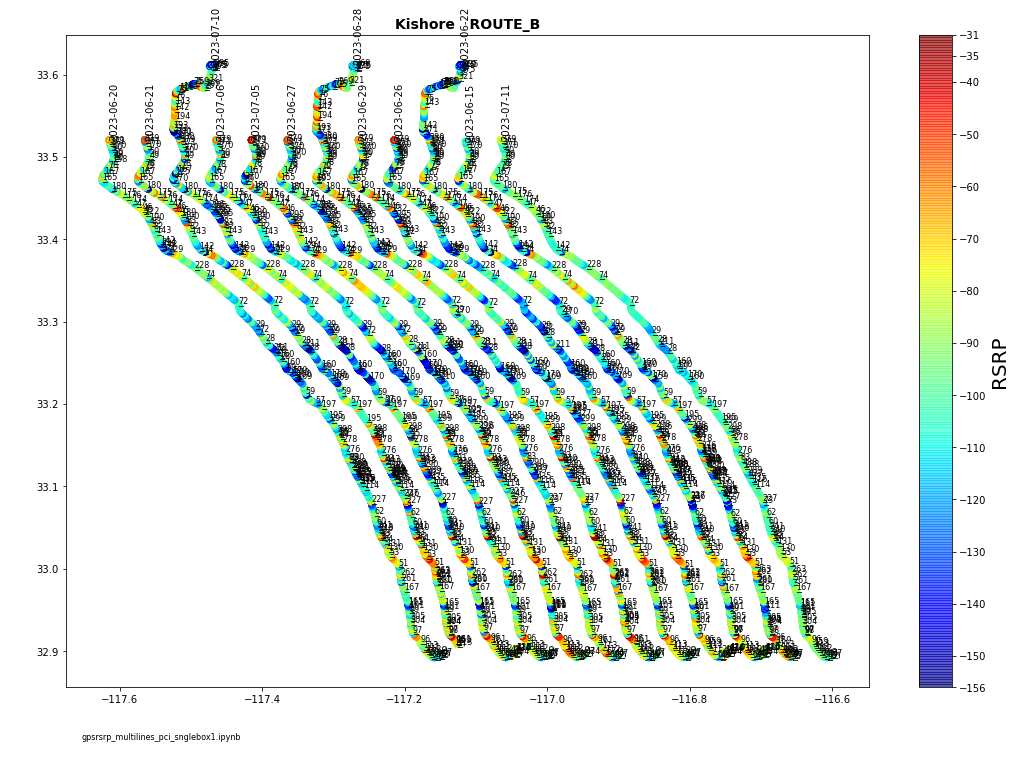

In [4]:
fig,ax = plt.subplots(figsize=(18,12))
ax.set_facecolor('white')

cnt = 0
for fle in all_files:
    df = pd.read_csv(fle,low_memory=True)
    numcols = len(df.columns)
    #print("fname: {0}; no. of cloumns: {1}".format(fle, numcols))
    #display(df)
    #display(df.columns)
    rte = "ROUTE_B"                             #change ROUTE A/B
    chk = df['route'].iloc[0]
    if(chk == rte):
        cnt += 1
        print(fle)
        date1 = fle.split("/")[-1]
        seldate = date1[28:38]
        val = cnt*0.05
        df["Lon"] = df['Lon'] + val
        df.drop(["index","GPS","cputime","speed","altitude","date","time","index.1",
                "route","cellinfo","cputime.1","ncells","type","rsrq",
                "sinr","rssi","level","dcpu"], axis=1, inplace=True)
        #df = df[df['rsrp'] < -1000.]
        df = df[(df['rsrp'] >= -156.) & (df['rsrp'] <= -31.)]

        #differences between two rows
        df['pcidiff'] = df['pci'].diff()

        #finding the indices values of non-zero in python list
        data = df['pcidiff'].tolist()
        indcs = [idx for idx, val in enumerate(data) if val !=0]
        print(indcs)
        #collecting the pci values corresponding indcs
        data1 = df["pci"].values
        pcivals = data1[indcs]
        pcivals = pcivals.astype(int)
        
        #display(df.iloc[100:120])
        #plt.xlim(-112.7,-112.0)
        xlon = len(df) // 2
    
        sc = ax.scatter(df['Lon'], df['Lat'], c=df['rsrp'], cmap='jet',  s=1.5, alpha=0.65 , linewidths=6 )
        ax.text(df['Lon'].iloc[-1], df["Lat"].iloc[-1]+0.002,str(seldate),rotation=90)
        ax.text(df['Lon'].iloc[0], df['Lat'].iloc[0]+0.001,'SP',rotation=90)
        for kk in range(len(indcs)):
            j = indcs[kk]
            ax.text(df['Lon'].iloc[j], df['Lat'].iloc[j],'_') 
            ax.text(df['Lon'].iloc[j], df['Lat'].iloc[j],pcivals[kk],fontsize=8)
            
print(f"Route: {rte}  no. of files: {cnt}")
# Set the colorbar
cbar = plt.colorbar(sc,ticks=[-156,-150,-140,-130,-120,-110,-100,-90,-80,-70,-60,-50,-40,-35,-31])
cbar.set_label('RSRP',fontsize=20)
sc.set_clim(-156,-31.)  
# cbar.ax.set_yticklabels(np.arange(-140., -50.+15, 15), fontsize=14, weight='bold') 
tit = name + '   ' + rte
plt.title(tit,fontsize=14,weight='bold')
plt.annotate(prgname, xy=(0.08,0.04), xycoords='figure fraction', ha='left',color='black',fontsize=8)
plt.show()


#save image
outpath= "/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/test/signal_prediction_plots/"
vfname = outpath+name +'_'+rte+ '_RSRP_cell_gps_heatmaps_pcis_multi.png'
fig.savefig(vfname)

In [5]:
display(indcs,pcivals)

[0,
 81,
 99,
 129,
 149,
 159,
 169,
 179,
 189,
 199,
 209,
 419,
 429,
 439,
 610,
 700,
 780,
 790,
 820,
 880,
 910,
 940,
 1130,
 1190,
 1230,
 1260,
 1310,
 1360,
 1380,
 1410,
 1430,
 1440,
 1450,
 1470,
 1481,
 1501,
 1541,
 1591,
 1601,
 1671,
 1691,
 1701,
 1721,
 1731,
 1761,
 1771,
 1791,
 1821,
 1881,
 1901,
 1911,
 1931,
 1971,
 1991,
 2071,
 2101,
 2151,
 2221,
 2231,
 2281,
 2291,
 2301,
 2362,
 2402,
 2412,
 2452,
 2592,
 2742,
 2802,
 2912,
 2932,
 2992,
 3012,
 3032,
 3052,
 3062,
 3082,
 3092,
 3133,
 3153,
 3183,
 3203,
 3243,
 3283,
 3313,
 3343,
 3353,
 3383,
 3393,
 3413,
 3443,
 3453,
 3473]

array([ 47,  46,  45,  66,  68,  96, 112, 111, 113, 159,  96,  97,  98,
        97, 304, 305,  97, 305,  99, 101, 111, 165, 167, 261, 262, 263,
        51,  53, 130, 131,  64,  82,  83, 240, 241,  60,  62,  73, 227,
       114, 116, 435, 437, 289, 288, 438,  83, 276, 278,  55,  56, 298,
       299, 195, 197,  57,  59, 160, 170,  59, 170, 160,  28, 211,  28,
        29,  72,  74, 228,  74, 142, 143,  82,  83,  69, 190, 322,  46,
        47, 174, 176, 175, 180, 165, 167,  79,  78,  80,  49,  90, 370,
       371, 379])